In [1]:
import tensorflow as tf

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split

## 1) Importing the data

In [146]:
df = pd.read_csv('C:\\Users\\akhan\\Desktop\\python_class\\kc_house_data.csv')

In [147]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [148]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


## 2) Preprocessing the data

C:\Software\Anaconda\envs\TF2_new_PY\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

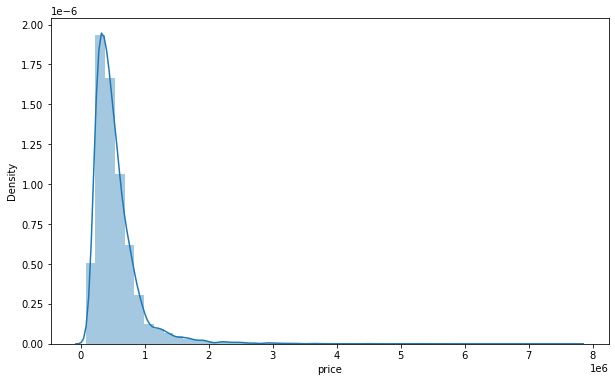

In [149]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

In [150]:
# from figure above we can see prices above 3 milion are very rare, they will reduce the accuracy of the model.
# So top 1% of prices should be dropped

### droping outliers

In [151]:
len(df)*0.01

215.97

In [152]:
df = df.sort_values('price', ascending = False).iloc[216:]

C:\Software\Anaconda\envs\TF2_new_PY\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

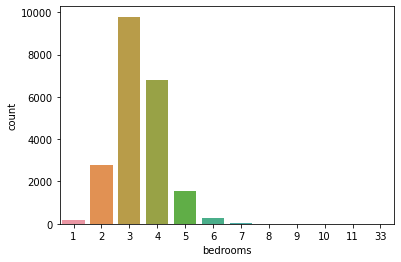

In [153]:
sns.countplot(df['bedrooms'])

#### Checking correlation between different fitures and the target variable

In [154]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.011625,0.003812,0.009708,-0.007326,-0.132405,0.020338,0.003020,0.018426,-0.023442,0.014519,-0.007105,-0.001596,0.021990,-0.015765,-0.007690,-0.000622,0.020567,0.001949,-0.138509
price,-0.011625,1.000000,0.315243,0.507692,0.678717,0.098535,0.279140,0.143594,0.343710,0.036132,0.680634,0.583757,0.284659,0.063608,0.119732,-0.045944,0.364436,0.041848,0.602252,0.088468
bedrooms,0.003812,0.315243,1.000000,0.506785,0.581459,0.032395,0.170801,-0.026818,0.062320,0.023701,0.344950,0.472238,0.295094,0.159700,0.015007,-0.154104,-0.015075,0.136370,0.385516,0.029907
bathrooms,0.009708,0.507692,0.506785,1.000000,0.742096,0.085784,0.505683,0.016588,0.150484,-0.133308,0.649539,0.668818,0.255086,0.523879,0.042843,-0.206038,0.015308,0.236568,0.555672,0.085025
sqft_living,-0.007326,0.678717,0.581459,0.742096,1.000000,0.175390,0.353551,0.032844,0.238524,-0.067616,0.748071,0.867595,0.405609,0.339067,0.042081,-0.204893,0.041696,0.263071,0.754872,0.185773
sqft_lot,-0.132405,0.098535,0.032395,0.085784,0.175390,1.000000,-0.007392,0.020405,0.073998,-0.007635,0.111245,0.184457,0.011788,0.051807,0.007462,-0.131155,-0.087775,0.229420,0.146135,0.713360
floors,0.020338,0.279140,0.170801,0.505683,0.353551,-0.007392,1.000000,0.009061,0.014430,-0.268964,0.459577,0.528785,-0.264745,0.496333,0.004237,-0.060544,0.046503,0.129084,0.276617,-0.012974
waterfront,0.003020,0.143594,-0.026818,0.016588,0.032844,0.020405,0.009061,1.000000,0.352554,0.017226,0.028045,0.016763,0.034887,-0.038639,0.090955,0.045725,-0.028034,-0.053665,0.041863,0.028715
view,0.018426,0.343710,0.062320,0.150484,0.238524,0.073998,0.014430,0.352554,1.000000,0.041134,0.211736,0.123413,0.250284,-0.058687,0.096373,0.092815,-0.004597,-0.078206,0.249203,0.070213
condition,-0.023442,0.036132,0.023701,-0.133308,-0.067616,-0.007635,-0.268964,0.017226,0.041134,1.000000,-0.156217,-0.169248,0.175842,-0.359330,-0.060745,-0.000397,-0.016113,-0.104267,-0.101174,-0.001991


In [155]:
df.corr()['price'].sort_values()

zipcode         -0.045944
id              -0.011625
condition        0.036132
long             0.041848
yr_built         0.063608
sqft_lot15       0.088468
sqft_lot         0.098535
yr_renovated     0.119732
waterfront       0.143594
floors           0.279140
sqft_basement    0.284659
bedrooms         0.315243
view             0.343710
lat              0.364436
bathrooms        0.507692
sqft_above       0.583757
sqft_living15    0.602252
sqft_living      0.678717
grade            0.680634
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

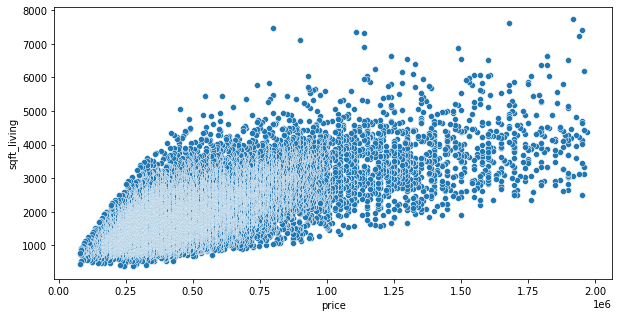

In [156]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'price', y = 'sqft_living', data = df)


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

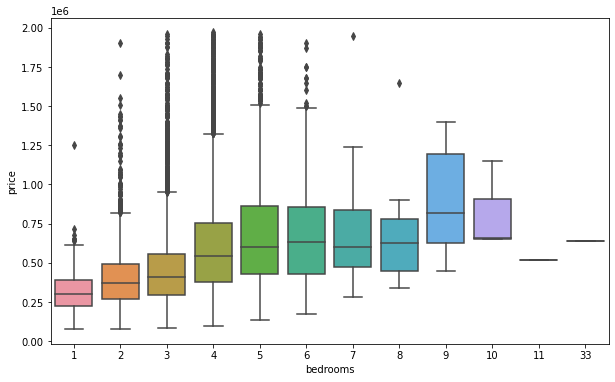

In [157]:
plt.figure(figsize= (10,6))
sns.boxplot(x='bedrooms', y = 'price', data = df)

<AxesSubplot:xlabel='price', ylabel='long'>

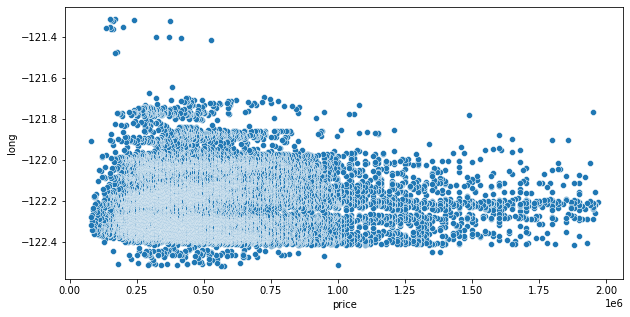

In [158]:
plt.figure(figsize = (10,5))
sns.scatterplot(x= 'price', y ='long', data = df)

##### where is the location of highest priced houses?

In [159]:
df.sort_values('price', ascending = False).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560


<AxesSubplot:xlabel='long', ylabel='lat'>

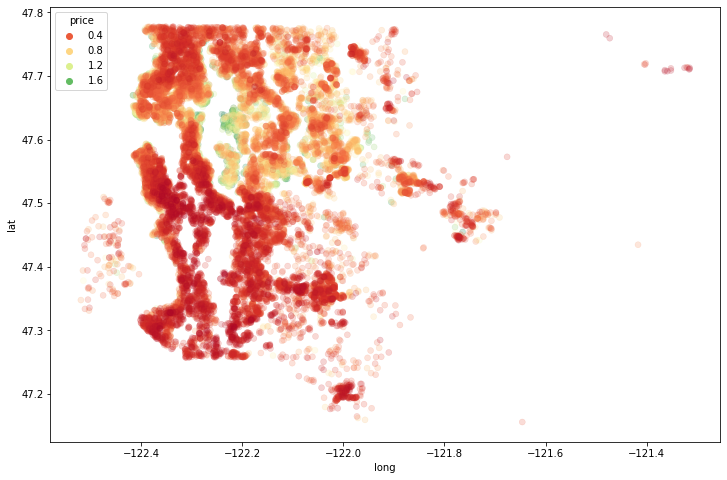

In [160]:
plt.figure(figsize = (12,8))
sns.scatterplot(x='long', y = 'lat', data = non_top_1_percent, 
                edgecolor = None, alpha = 0.2, palette = 'RdYlGn', hue = 'price')

<AxesSubplot:xlabel='waterfront', ylabel='price'>

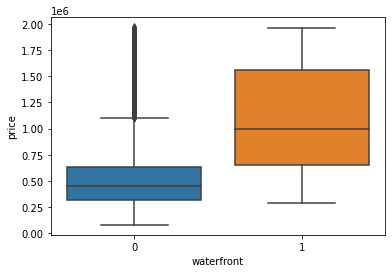

In [161]:
sns.boxplot(x= 'waterfront', y = 'price', data = df)

### Feature Engineering

In [162]:
df = df.drop('id', axis = 1)

In [163]:
df['date'] = pd.to_datetime(df['date'])

In [164]:
df['date']

6329    2014-06-02
12271   2014-10-15
9166    2015-02-13
12565   2015-04-22
1150    2015-04-21
           ...    
2139    2014-05-08
8267    2014-11-05
16184   2015-03-24
465     2014-05-23
15279   2014-05-06
Name: date, Length: 21381, dtype: datetime64[ns]

In [165]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [166]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
6329,2014-06-02,1970000.0,4,3.50,4370,8510,2.0,0,1,3,...,760,2003,0,98004,47.5876,-122.204,2960,10347,2014,6
12271,2014-10-15,1960000.0,5,4.50,6200,23373,3.0,0,1,4,...,1150,1988,0,98040,47.5632,-122.215,3700,14486,2014,10
9166,2015-02-13,1960000.0,3,1.75,3330,12566,1.0,1,4,4,...,1390,1960,0,98040,47.5287,-122.220,3730,16560,2015,2
12565,2015-04-22,1960000.0,4,4.00,4430,31353,2.0,0,0,3,...,0,1998,0,98005,47.6422,-122.157,3900,35237,2015,4
1150,2015-04-21,1960000.0,4,2.75,3120,7898,1.0,1,4,4,...,1560,1963,0,98034,47.7165,-122.259,2630,13868,2015,4


<AxesSubplot:xlabel='month'>

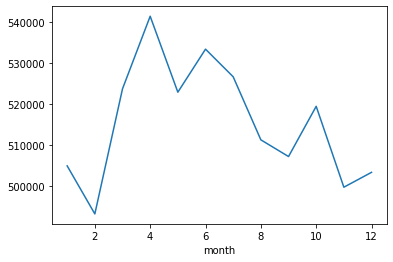

In [169]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

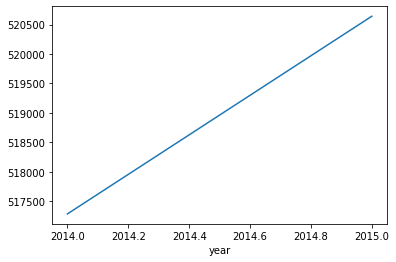

In [170]:
df.groupby('year').mean()['price'].plot()

In [171]:
df = df.drop('date', axis = 1)

In [172]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    582
98052    573
98117    553
        ... 
98010    100
98102     99
98024     80
98148     57
98039     29
Name: zipcode, Length: 70, dtype: int64

In [173]:
df = df.drop('zipcode', axis = 1)

In [174]:
df['yr_renovated'].value_counts()

0       20499
2014       91
2013       36
2007       34
2003       34
        ...  
1954        1
1944        1
1951        1
1959        1
1948        1
Name: yr_renovated, Length: 70, dtype: int64

In [175]:
df['sqft_basement'].value_counts()

0       13052
600       219
700       214
500       214
800       205
        ...  
1990        1
1798        1
518         1
374         1
1135        1
Name: sqft_basement, Length: 292, dtype: int64

## 3) Building and training the model

In [176]:
X = df.drop('price', axis = 1).values

In [177]:
y = df['price'].values

In [178]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [179]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=101)

In [180]:
from sklearn.preprocessing import MinMaxScaler

In [181]:
scaler = MinMaxScaler()

In [182]:
scaler.fit(X_train)


MinMaxScaler()

In [183]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [184]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [185]:
X.shape

(21381, 19)

In [186]:
model = Sequential()
model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))
model.add(Dense(1))


In [187]:
model.compile(optimizer = 'adam', loss = 'mse')

In [188]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 128, epochs = 400)

Epoch 1/400
117/117 [==============================] - 0s 1ms/step - loss: 346872807424.0000 - val_loss: 356851777536.0000
Epoch 2/400
117/117 [==============================] - 0s 750us/step - loss: 346031259648.0000 - val_loss: 353905147904.0000
Epoch 3/400
117/117 [==============================] - 0s 742us/step - loss: 334590148608.0000 - val_loss: 327137525760.0000
Epoch 4/400
117/117 [==============================] - 0s 741us/step - loss: 278208184320.0000 - val_loss: 231401701376.0000
Epoch 5/400
117/117 [==============================] - 0s 828us/step - loss: 155990704128.0000 - val_loss: 96600932352.0000
Epoch 6/400
117/117 [==============================] - 0s 733us/step - loss: 66504806400.0000 - val_loss: 56547319808.0000
Epoch 7/400
117/117 [==============================] - 0s 751us/step - loss: 54363570176.0000 - val_loss: 54797594624.0000
Epoch 8/400
117/117 [==============================] - 0s 784us/step - loss: 53469151232.0000 - val_loss: 53954588672.0000
Epoch 9/4

117/117 [==============================] - 0s 729us/step - loss: 23855480832.0000 - val_loss: 24564424704.0000
Epoch 68/400
117/117 [==============================] - 0s 716us/step - loss: 23798671360.0000 - val_loss: 24512303104.0000
Epoch 69/400
117/117 [==============================] - 0s 718us/step - loss: 23746525184.0000 - val_loss: 24458291200.0000
Epoch 70/400
117/117 [==============================] - 0s 716us/step - loss: 23678328832.0000 - val_loss: 24401879040.0000
Epoch 71/400
117/117 [==============================] - 0s 716us/step - loss: 23625256960.0000 - val_loss: 24378806272.0000
Epoch 72/400
117/117 [==============================] - 0s 725us/step - loss: 23574251520.0000 - val_loss: 24341698560.0000
Epoch 73/400
117/117 [==============================] - 0s 767us/step - loss: 23500781568.0000 - val_loss: 24261017600.0000
Epoch 74/400
117/117 [==============================] - 0s 940us/step - loss: 23440502784.0000 - val_loss: 24182382592.0000
Epoch 75/400
117/117 

Epoch 133/400
117/117 [==============================] - 0s 722us/step - loss: 21538992128.0000 - val_loss: 22565924864.0000
Epoch 134/400
117/117 [==============================] - 0s 708us/step - loss: 21514117120.0000 - val_loss: 22483326976.0000
Epoch 135/400
117/117 [==============================] - 0s 716us/step - loss: 21497128960.0000 - val_loss: 22461880320.0000
Epoch 136/400
117/117 [==============================] - 0s 750us/step - loss: 21461190656.0000 - val_loss: 22446039040.0000
Epoch 137/400
117/117 [==============================] - 0s 733us/step - loss: 21455958016.0000 - val_loss: 22432694272.0000
Epoch 138/400
117/117 [==============================] - 0s 921us/step - loss: 21443596288.0000 - val_loss: 22455877632.0000
Epoch 139/400
117/117 [==============================] - 0s 788us/step - loss: 21409540096.0000 - val_loss: 22432026624.0000
Epoch 140/400
117/117 [==============================] - 0s 801us/step - loss: 21407623168.0000 - val_loss: 22393458688.0000


117/117 [==============================] - 0s 738us/step - loss: 20986372096.0000 - val_loss: 21947244544.0000
Epoch 199/400
117/117 [==============================] - 0s 827us/step - loss: 20947734528.0000 - val_loss: 22071582720.0000
Epoch 200/400
117/117 [==============================] - 0s 818us/step - loss: 20948441088.0000 - val_loss: 21970524160.0000
Epoch 201/400
117/117 [==============================] - 0s 801us/step - loss: 20955314176.0000 - val_loss: 21928607744.0000
Epoch 202/400
117/117 [==============================] - 0s 733us/step - loss: 20946391040.0000 - val_loss: 21907628032.0000
Epoch 203/400
117/117 [==============================] - 0s 728us/step - loss: 20948236288.0000 - val_loss: 21897039872.0000
Epoch 204/400
117/117 [==============================] - 0s 784us/step - loss: 20937613312.0000 - val_loss: 21891256320.0000
Epoch 205/400
117/117 [==============================] - 0s 832us/step - loss: 20949295104.0000 - val_loss: 21891821568.0000
Epoch 206/400


117/117 [==============================] - 0s 766us/step - loss: 20765609984.0000 - val_loss: 21662296064.0000
Epoch 264/400
117/117 [==============================] - 0s 733us/step - loss: 20754604032.0000 - val_loss: 21719910400.0000
Epoch 265/400
117/117 [==============================] - 0s 707us/step - loss: 20769843200.0000 - val_loss: 21658863616.0000
Epoch 266/400
117/117 [==============================] - 0s 759us/step - loss: 20758157312.0000 - val_loss: 21659004928.0000
Epoch 267/400
117/117 [==============================] - 0s 733us/step - loss: 20747991040.0000 - val_loss: 21651890176.0000
Epoch 268/400
117/117 [==============================] - 0s 742us/step - loss: 20759724032.0000 - val_loss: 21654550528.0000
Epoch 269/400
117/117 [==============================] - 0s 725us/step - loss: 20736845824.0000 - val_loss: 21698746368.0000
Epoch 270/400
117/117 [==============================] - 0s 732us/step - loss: 20731054080.0000 - val_loss: 21668560896.0000
Epoch 271/400


117/117 [==============================] - 0s 893us/step - loss: 20619819008.0000 - val_loss: 21501755392.0000
Epoch 329/400
117/117 [==============================] - 0s 708us/step - loss: 20603701248.0000 - val_loss: 21501741056.0000
Epoch 330/400
117/117 [==============================] - 0s 776us/step - loss: 20612947968.0000 - val_loss: 21521829888.0000
Epoch 331/400
117/117 [==============================] - 0s 763us/step - loss: 20609609728.0000 - val_loss: 21523408896.0000
Epoch 332/400
117/117 [==============================] - 0s 716us/step - loss: 20598235136.0000 - val_loss: 21514166272.0000
Epoch 333/400
117/117 [==============================] - 0s 716us/step - loss: 20615129088.0000 - val_loss: 21534568448.0000
Epoch 334/400
117/117 [==============================] - 0s 725us/step - loss: 20606355456.0000 - val_loss: 21516331008.0000
Epoch 335/400
117/117 [==============================] - 0s 750us/step - loss: 20596832256.0000 - val_loss: 21561456640.0000
Epoch 336/400


117/117 [==============================] - 0s 742us/step - loss: 20504320000.0000 - val_loss: 21388646400.0000
Epoch 394/400
117/117 [==============================] - 0s 725us/step - loss: 20494491648.0000 - val_loss: 21386164224.0000
Epoch 395/400
117/117 [==============================] - 0s 725us/step - loss: 20496977920.0000 - val_loss: 21378136064.0000
Epoch 396/400
117/117 [==============================] - 0s 733us/step - loss: 20527601664.0000 - val_loss: 21380614144.0000
Epoch 397/400
117/117 [==============================] - 0s 733us/step - loss: 20500692992.0000 - val_loss: 21374898176.0000
Epoch 398/400
117/117 [==============================] - 0s 725us/step - loss: 20492447744.0000 - val_loss: 21372250112.0000
Epoch 399/400
117/117 [==============================] - 0s 755us/step - loss: 20487993344.0000 - val_loss: 21373089792.0000
Epoch 400/400
117/117 [==============================] - 0s 750us/step - loss: 20502913024.0000 - val_loss: 21364969472.0000


## 4) Evaluating the model

In [190]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,3.468728e+11,3.568518e+11
1,3.460313e+11,3.539051e+11
2,3.345901e+11,3.271375e+11
3,2.782082e+11,2.314017e+11
4,1.559907e+11,9.660093e+10
...,...,...
395,2.052760e+10,2.138061e+10
396,2.050069e+10,2.137490e+10
397,2.049245e+10,2.137225e+10
398,2.048799e+10,2.137309e+10


<AxesSubplot:>

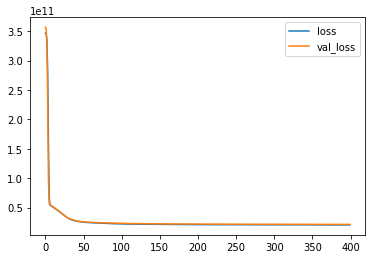

In [191]:
losses.plot()

In [192]:
model.evaluate(X_test, y_test)


201/201 [==============================] - 0s 352us/step - loss: 21364969472.0000


21364969472.0

In [193]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,explained_variance_score

In [194]:
predictions = model.predict(X_test)
predictions

array([[815286.75],
       [564883.1 ],
       [439671.7 ],
       ...,
       [492060.25],
       [463744.4 ],
       [629104.44]], dtype=float32)

In [195]:
mean_squared_error(y_test, predictions)

21364970319.99718

In [196]:
mean_absolute_error(y_test, predictions)

98041.02574410562

In [197]:
df['price'].describe()

count    2.138100e+04
mean     5.183675e+05
std      2.849428e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.350000e+05
max      1.970000e+06
Name: price, dtype: float64

In [198]:
explained_variance_score(y_test, predictions)

0.7406797060375697

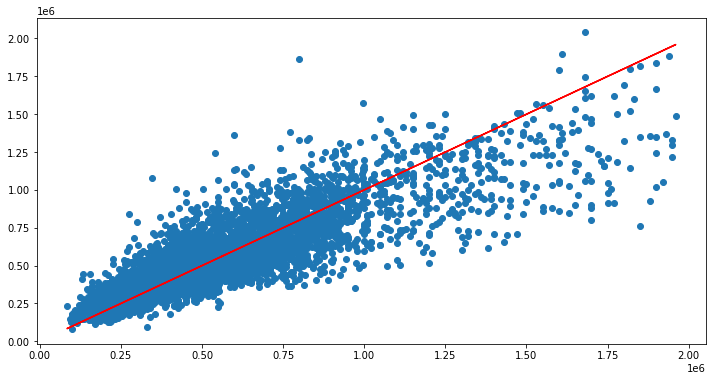

In [199]:
plt.figure(figsize = (12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

In [201]:
# the model has a good performance, the accuarcy is a bit lower in more expensive houses.